In [241]:
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [242]:
#reorder alignment
table = str.maketrans('', '', string.ascii_lowercase)
def reorder_alignment_for_plot(num):
    new_sequence = []
    with open('test.txt', "r") as ifile:
        # this count keeps track of total lines
        count = 0
        for line in ifile:
            if 'sequence' in line:
                # this bit simply removes non-sequence chars from the line
                new_sequence.append(line.translate(table).strip('\n '))
                count=count+1
    # count/num gives the lines per sequence
    return count/num, new_sequence
#print(alignment)

lines, new_sequence = reorder_alignment_for_plot(2)

#print(new_sequence)



/Users/robincorey/miniconda3/envs/pensa/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: FixedFormatter should only be used together with FixedLocator


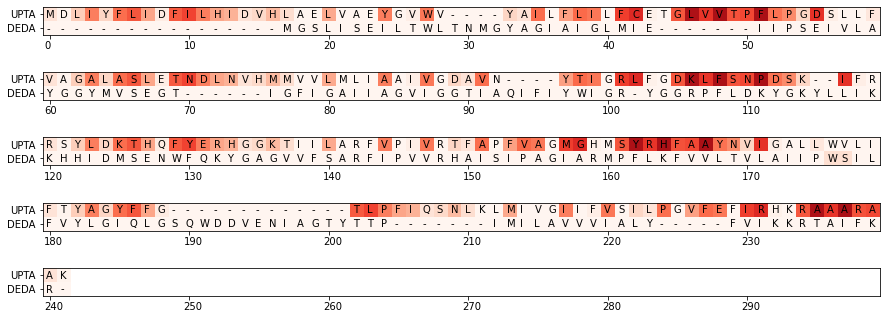

In [264]:
def get_occupancy(sequence,lines, system, occupancy_count_in, total_count_in):
    occupancy = []
    with open('Occupancy.txt','r') as ifile:
        for line in ifile:
            if '>' not in line:
                if '0' in line:
                    occupancy.append(line.split( ))
    heatmap = []
    sequence_array = []
    # to keep track of progress through occupancy file
    occupancy_count = occupancy_count_in
    residue_count = occupancy_count_in
    total_count = total_count_in
    for aa,char in enumerate(sequence):
        if char != '-':
            heatmap.append(float(occupancy[system][residue_count]))
            sequence_array.append(char)
            occupancy_count = occupancy_count+1
            residue_count = residue_count+1
            total_count = total_count+1
        else:
            heatmap.append(-1)
            sequence_array.append(char)
            total_count = total_count+1
    return heatmap, sequence_array, occupancy_count, total_count

# working in here - this needs to be edited for the new Occupancy_reformatted file 
def get_occupancy_reordered(sequence,lines, system, occupancy_count_in, total_count_in):
    occupancy = []
    with open('Occupancy_reformatted.txt','r') as ifile:
        for line in ifile:
                occupancy.append(line.split( ))
    heatmap = []
    sequence_array = []
    # to keep track of progress through occupancy file
    occupancy_count = occupancy_count_in
    residue_count = occupancy_count_in
    total_count = total_count_in
    for aa,char in enumerate(sequence):
        if char != '-':
            heatmap.append(float(occupancy[system][residue_count]))
            sequence_array.append(char)
            occupancy_count = occupancy_count+1
            residue_count = residue_count+1
            total_count = total_count+1
        else:
            heatmap.append(-1)
            sequence_array.append(char)
            total_count = total_count+1
    return heatmap, sequence_array, occupancy_count, total_count

def reformat_occupancy():
    occupancy = []
    with open('Occupancy.txt','r') as ifile:
        for line in ifile:
            if '>' not in line:
                if '0' in line:
                    occupancy.append(line.split( ))
    return occupancy

occupancy = reformat_occupancy()

# this makes a new occupancy file which is formatted as per the alignment file
def occupancy_to_new_file ():
    f = open('Occupancy_reformatted.txt','w')
    for system in np.arange(0,count):
        reformatted_occupancy = []
        residue_count = 0
        for line in np.array(range(int(lines))):
            sequence = new_sequence[system+(line*count)]
            reformatted_occupancy.append(sequence)
            f = open('Occupancy_reformatted.txt','a')
            for aa,char in enumerate(sequence):
                if char != '-':
                    f.write('%s ' % occupancy[system][residue_count])
                    residue_count = residue_count+1
                else:
                    f.write(' - ')
            f.write('\n')

occupancy_to_new_file()
        
def plot_sequence(heatmap_array,alignment_line,line, sys1, sys2):
    #takes an array of single letter AA codes and residue attribute values
    axs[line].set_yticklabels(['',sys1,sys2])
    axs[line].set_xticklabels('')
    im = axs[line].imshow(heatmap_array, cmap='Reds', vmin=0, vmax=100 )

def add_labels(text_array_1,text_array_2,alignment_line,line):
    for x,y in enumerate(np.arange(len(text_array_1))):
        axs[line].text(x-0.25,0.25, text_array_1[x], fontsize=10)
    for x,y in enumerate(np.arange(len(text_array_2))):
        axs[line].text(x-0.25,(1.25), text_array_2[x], fontsize=10)
        
def add_ticks(offset,line):
    for x,y in enumerate(np.arange(0,60,step=10)):
        axs[line].text(y-0.4,2.5, y+offset, fontsize=10)
    
sys1 = 'UPTA'
sys2 = 'DEDA'
count = 2 ### THIS NEEDS TO BE SET FROM FIRST PART OF SCRIPT
lines = 5

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(lines*(count+1), 6)
gs = fig.add_gridspec(lines,1, hspace=0)
axs = gs.subplots(sharex=True)

# for each line, make an array of sequences and plot
a = np.array(range(int(lines)))
total_count = 0
for line in a[::-1]: 
    # loop through systems, i.e. input files
    heatmap_array = []
    text_array = []
    for system in np.arange(0,count):
        occupancy_count = 0 # this will be wrong
        alignment_line = line*count+system
        heatmap_values, sequence_array, occupancy_count, total_count = get_occupancy(
            new_sequence[alignment_line], lines, system, occupancy_count, total_count )
        heatmap_array.append(heatmap_values)
        text_array.append(sequence_array)
        #print(heatmap_array)
        plot_sequence(heatmap_array, alignment_line, line, sys1, sys2)
    add_labels(text_array[0],text_array[1],alignment_line, line)

for line in np.array(range(int(lines))): #a[::-1]:
    #print(total_count, line)
    pass
    add_ticks(line*60, line)
    
    
# Need to resolve: 
# more than 2 seqs

